In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("E:\Workstation\Waste\waste",target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 8369 images belonging to 9 classes.


In [3]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [4]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [5]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [6]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

#`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
result = model.fit(train_data, epochs = 8, steps_per_epoch=10)

Epoch 1/8
10/10 [==============================] - 53s 5s/step - loss: 2.6831 - accuracy: 0.1719
Epoch 2/8
10/10 [==============================] - 56s 6s/step - loss: 2.5852 - accuracy: 0.2000
Epoch 3/8
10/10 [==============================] - 55s 5s/step - loss: 2.2046 - accuracy: 0.2344
Epoch 4/8
10/10 [==============================] - 56s 5s/step - loss: 2.0796 - accuracy: 0.2656
Epoch 5/8
10/10 [==============================] - 56s 5s/step - loss: 2.0289 - accuracy: 0.2969
Epoch 6/8
10/10 [==============================] - 58s 6s/step - loss: 1.9309 - accuracy: 0.3063
Epoch 7/8
10/10 [==============================] - 56s 5s/step - loss: 2.0702 - accuracy: 0.2937
Epoch 8/8
10/10 [==============================] - 57s 6s/step - loss: 1.8407 - accuracy: 0.3562


In [8]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


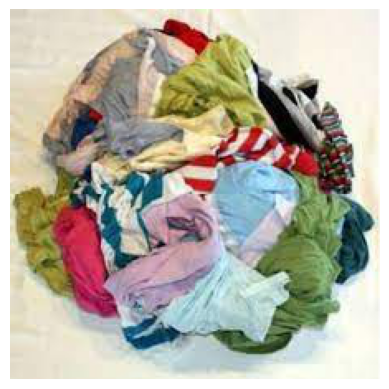

1/1 [==============================] - 0s 335ms/step
Your waste material is  clothes  with  87.6  % accuracy


In [10]:
waste_prediction("E:\Workstation\Waste\clo.jfif")

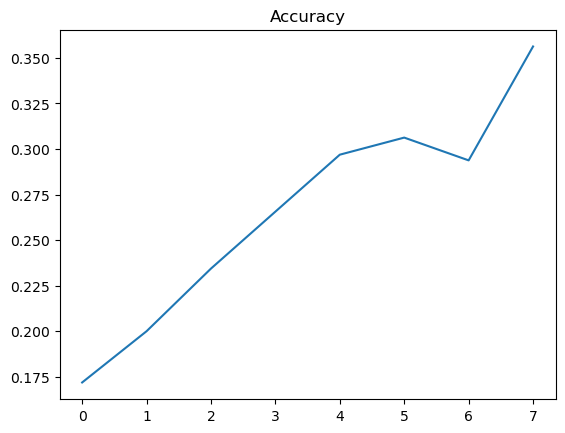

In [11]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

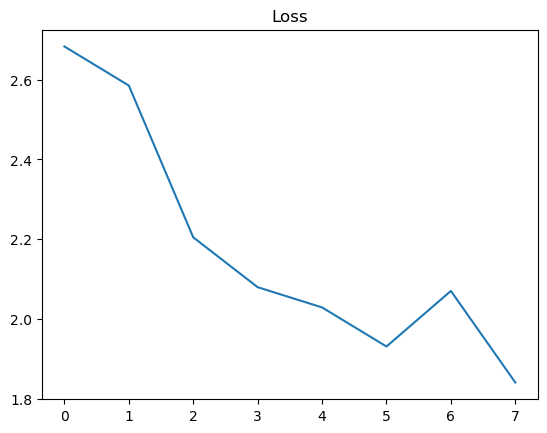

In [12]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [13]:
model.save("classifyWaste.h5")